# Risk Case Study

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

## Data Collection

In [2]:
tickers = ['AAPL', 'MSFT', 'SPY']

In [3]:
data = yf.download(tickers, period="2y", auto_adjust=True, progress=False)
close_prices = data['Close']

## Calculate Returns

In [4]:
returns = close_prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,SPY
Date,,,
2023-09-21,-0.008890,-0.003866,-0.016528
2023-09-22,0.004944,-0.007886,-0.002248
2023-09-25,0.007380,0.001672,0.004205
2023-09-26,-0.023398,-0.017006,-0.014691
2023-09-27,-0.008897,0.002082,0.000399


In [5]:
long_returns = returns.reset_index().melt(
    id_vars="Date",
    var_name="Ticker",
    value_name="Returns"
)

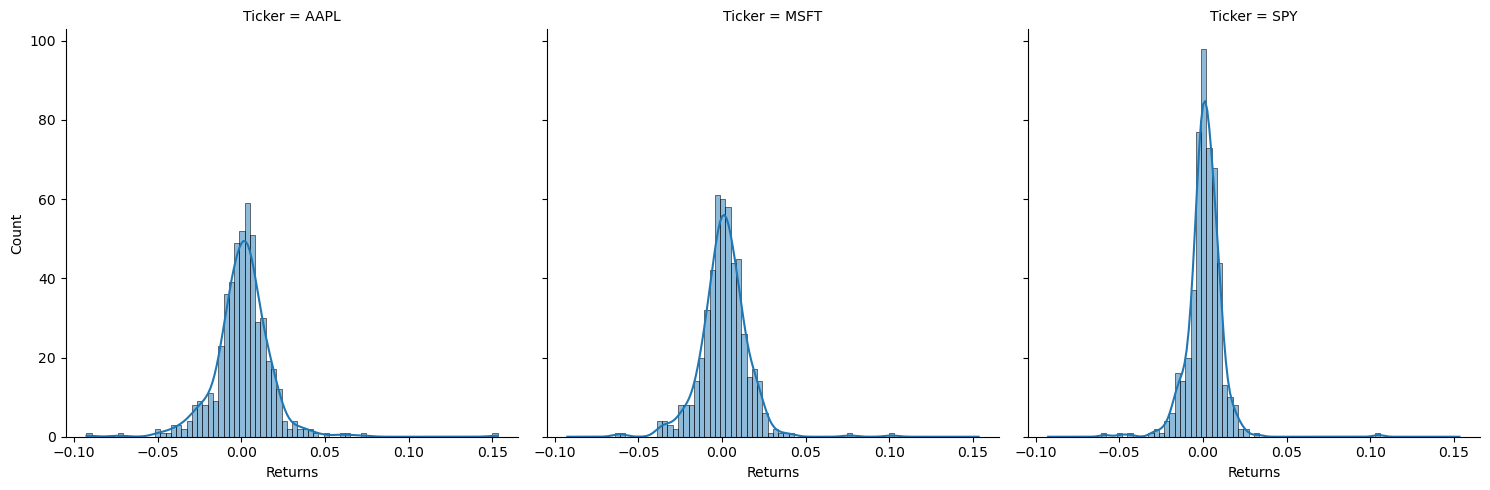

In [6]:
sns.displot(
    data=long_returns,
    x="Returns",
    col="Ticker",
    kde=True
);

# Basic Descriptive Stats

In [9]:
return_mean = returns.mean()
return_vol = returns.std()
corr = returns.corr()

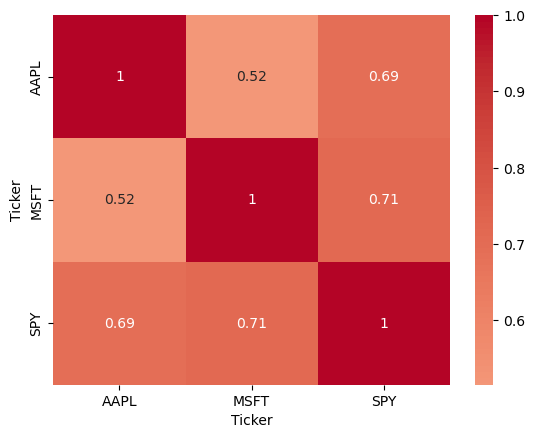

In [19]:
sns.heatmap(
    data=corr,
    annot=True,
    cmap="coolwarm",
    center=0
);

## Risk-Adjusted Performance

In [35]:
# Even 50-50 portfolio split of AAPL and MSFT
portfolio = (returns['AAPL'] * 0.5) + (returns['MSFT'] * 0.5)
portfolio_mean = portfolio.mean()
portfolio_vol = portfolio.std()

In [36]:
portfolio_sharpe = portfolio_mean / portfolio_vol
sharpe = return_mean / return_vol

In [37]:
for ticker in sharpe.index:
    print(f"{ticker}: {sharpe[ticker]:.3f}")

print(f"Portfolio (MSFT, AAPL): {portfolio_sharpe:.3f}")

AAPL: 0.048
MSFT: 0.077
SPY: 0.090
Portfolio (MSFT, AAPL): 0.070


## Value-at-Risk (alpha=0.05)

In [38]:
var_95 = portfolio_mean + (-1.645 * portfolio_vol)

In [49]:
print(f"On 95% of days our portfolio does not expect to lose more than {-var_95:.3f}%")

On 95% of days our portfolio does not expect to lose more than 0.022%


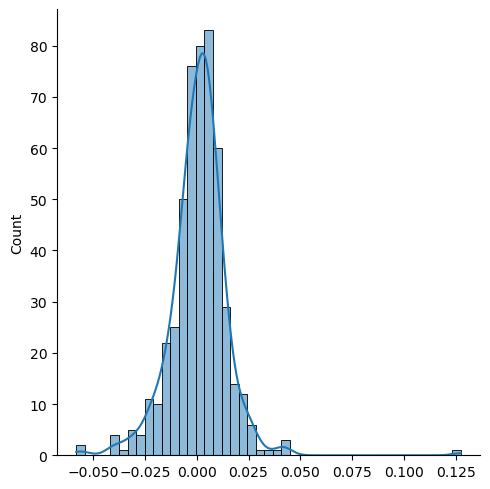

In [52]:
sns.displot(
    data=portfolio,
    kde=True
);